## 1. Imports

In [242]:
import pandas as pd
import numpy as np

from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import (
    MinMaxScaler,
    StandardScaler
)


## 2. Dataset

In [39]:
df_ptbdb_abnormal = pd.read_csv("./data/ptbdb_abnormal.csv", header=None)
df_ptbdb_normal = pd.read_csv("./data/ptbdb_normal.csv", header=None)

df_ptbdb = pd.concat(
    [
        df_ptbdb_normal, 
        df_ptbdb_abnormal
    ], 
    axis=0
)

df_ptbdb.rename(columns={187: 'class'}, inplace=True)

df_ptbdb = df_ptbdb.sample(10553).reset_index(drop=True)

df_ptbdb

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,class
0,0.977343,0.651690,0.157834,0.043395,0.097926,0.159370,0.141321,0.130952,0.132488,0.129032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.948727,0.895979,0.554777,0.319439,0.191442,0.108078,0.055330,0.054592,0.046477,0.037256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.788079,0.691317,0.631347,0.521707,0.444444,0.381898,0.322296,0.231788,0.276674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.000000,0.510154,0.129846,0.132923,0.189538,0.195692,0.193231,0.174154,0.195692,0.179692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.000000,0.716685,0.418721,0.136835,0.037156,0.011075,0.127188,0.178992,0.232940,0.242229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10548,0.916523,1.000000,0.669535,0.333907,0.243546,0.160929,0.102410,0.084337,0.080895,0.087780,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10549,0.996269,0.587313,0.501493,0.595522,0.700746,0.629851,0.587313,0.589552,0.607463,0.566418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10550,1.000000,0.835703,0.277251,0.063586,0.084913,0.149684,0.140600,0.130727,0.125987,0.122828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10551,0.982309,0.805400,0.687151,0.631285,0.554935,0.445065,0.384544,0.310987,0.283985,0.256052,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 3. Limpeza

In [51]:
df_ptbdb.isnull().sum().sum()

0

In [49]:
(df_ptbdb.dtypes != np.float64).sum()

0

## 4. Tratamento

In [71]:
mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()

In [81]:
data_st_scaler = st_scaler.fit_transform(df_ptbdb.values)

data_mm_scaler = mm_scaler.fit_transform(data_st_scaler)

In [83]:
df_ptbdb = pd.DataFrame(data_mm_scaler, columns=df_ptbdb.columns)

## 5. AED

### 5.1. Correlação com classe

In [90]:
corr_class = df_ptbdb.corr()["class"]

In [93]:
corr_class = corr_class.apply(abs)

corr_class

0        0.057929
1        0.031560
2        0.224139
3        0.304418
4        0.334695
           ...   
183      0.015709
184      0.025979
185      0.025819
186           NaN
class    1.000000
Name: class, Length: 188, dtype: float64

#### Colunas com correlação nula com classe

In [116]:
corr_class[corr_class.isnull()].index

Index([186], dtype='object')

In [120]:
cols_corr_class_null = set(corr_class[corr_class.isnull()].index.values)

#### Colunas com correlação alta com classe

In [229]:
def get_greater_corr_limiar(data: pd.Series, limiar: float) -> (pd.Series, float):
    """
    data: lista de correlações
    limiar: limite inferior de correlação para não ser considerado baixo

    return: 
     - colunas com correlação acima do limiar
     - porcentagem de colunas com correlação acima do limiar
    """

    true_values =  data[data >= limiar]

    pct = true_values.shape[0] / data.shape[0]

    cols = true_values.index

    return cols, pct

In [147]:
cols_corr_class_greater_01, pct = get_greater_corr_limiar(corr_class, 0.01)

pct

0.9361702127659575

In [148]:
cols_corr_class_greater_05, pct = get_greater_corr_limiar(corr_class, 0.05)

pct

0.7606382978723404

In [149]:
cols_corr_class_greater_10, pct = get_greater_corr_limiar(corr_class, 0.10)

pct

0.6223404255319149

In [150]:
cols_corr_class_greater_15, pct = get_greater_corr_limiar(corr_class, 0.15)

pct

0.3723404255319149

In [151]:
cols_corr_class_greater_20, pct = get_greater_corr_limiar(corr_class, 0.20)

pct

0.2127659574468085

In [152]:
cols_corr_class_greater_25, pct = get_greater_corr_limiar(corr_class, 0.25)

pct

0.05319148936170213

#### Colunas com correlação alta entre si

In [190]:
df_corr = df_ptbdb.corr()

df_corr = df_corr.drop([186, "class"], axis=1)

df_corr = df_corr.drop([186, "class"], axis=0)

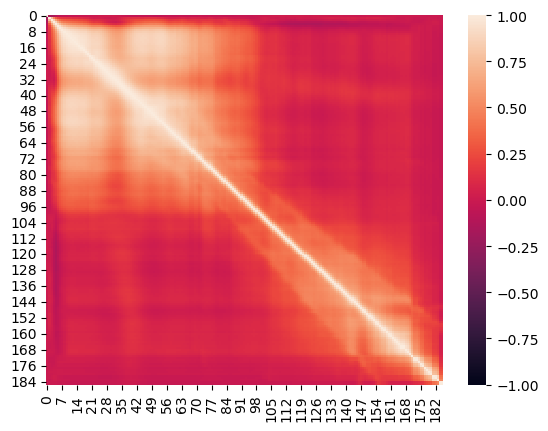

In [191]:
sns.heatmap(df_corr, vmin=-1, vmax=1)

plt.show()

In [192]:
df_corr = df_corr.abs()

In [257]:
def get_pair_high_corr(data: pd.DataFrame, limiar: float):
    pair_values = defaultdict(set)

    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            key, value = min([i, j]), max([i, j])

            if i == j:
                continue
            
            if data.iloc[i, j] >= limiar:
                pair_values[key].add(value)
    
    return pair_values

In [258]:
pair_values = get_pair_high_corr(df_corr, 0.90)

In [259]:
pair_values

defaultdict(set,
            {5: {6},
             6: {7, 8},
             7: {8, 9, 10, 11},
             8: {9, 10, 11, 12, 13, 14, 15},
             9: {10, 11, 12, 13, 14, 15, 16, 17, 18},
             10: {11, 12, 13, 14, 15, 16, 17, 18, 19},
             11: {12, 13, 14, 15, 16, 17, 18, 19},
             12: {13, 14, 15, 16, 17, 18, 19, 20},
             13: {14, 15, 16, 17, 18, 19, 20},
             14: {15, 16, 17, 18, 19, 20},
             15: {16, 17, 18, 19, 20},
             16: {17, 18, 19, 20},
             17: {18, 19, 20, 22},
             18: {19, 20, 21, 22, 23, 24},
             19: {20, 21, 22, 23, 24},
             20: {21, 22, 23, 24},
             21: {22, 23, 24},
             22: {23, 24, 25, 26},
             23: {24, 25, 26, 27},
             24: {25, 26, 27, 28, 29},
             25: {26, 27, 28, 29},
             26: {27, 28, 29, 30},
             27: {28, 29, 30, 31, 32},
             28: {29, 30, 31, 32, 33},
             29: {30, 31, 32, 33},
           